# Lane Detection Advance:
-------

In [1]:
import os
import sys
sys.path.insert(0, '../..')
# from src.lane

In [2]:
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip
from IPython.display import HTML

from src import commons
from src.lane_line_advance.calibrate_camera import undistort
from src.lane_line_advance.params import *
from src.lane_line_advance.pipeline import preprocessing_pipeline, lane_curvature_pipeline, postprocessing_pipeline

1.0


In [3]:
video_name = "project_video"
input_video_path = f'./data/{video_name}.mp4'
output_video_path = f'./data/{video_name}'
output_img_dir = f"./data/debug_images/{video_name}"
test_img_dir = f"./data/test_images/"

test_image_name = "test5"# "# "bridge_shadow" #"0"  #"0"
input_image_path = f'{test_img_dir}/{test_image_name}.jpg'
output_img_dir = f'{output_img_dir}/{test_image_name}'

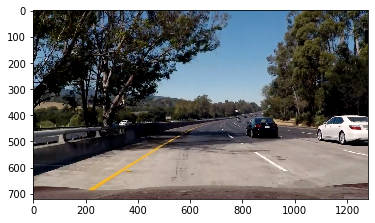

In [12]:
image = commons.read_image(input_image_path)
plt.imshow(image)

# Camera Calibration (Undistort)

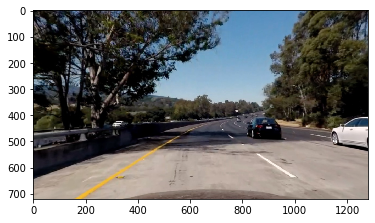

In [17]:
image = undistort(
    img=image, camera_matrix=CameraParams.camera_matrix,
    distortion_coefficients=CameraParams.distortion_coefficients
)
plt.imshow(image)

# Preprocess Image

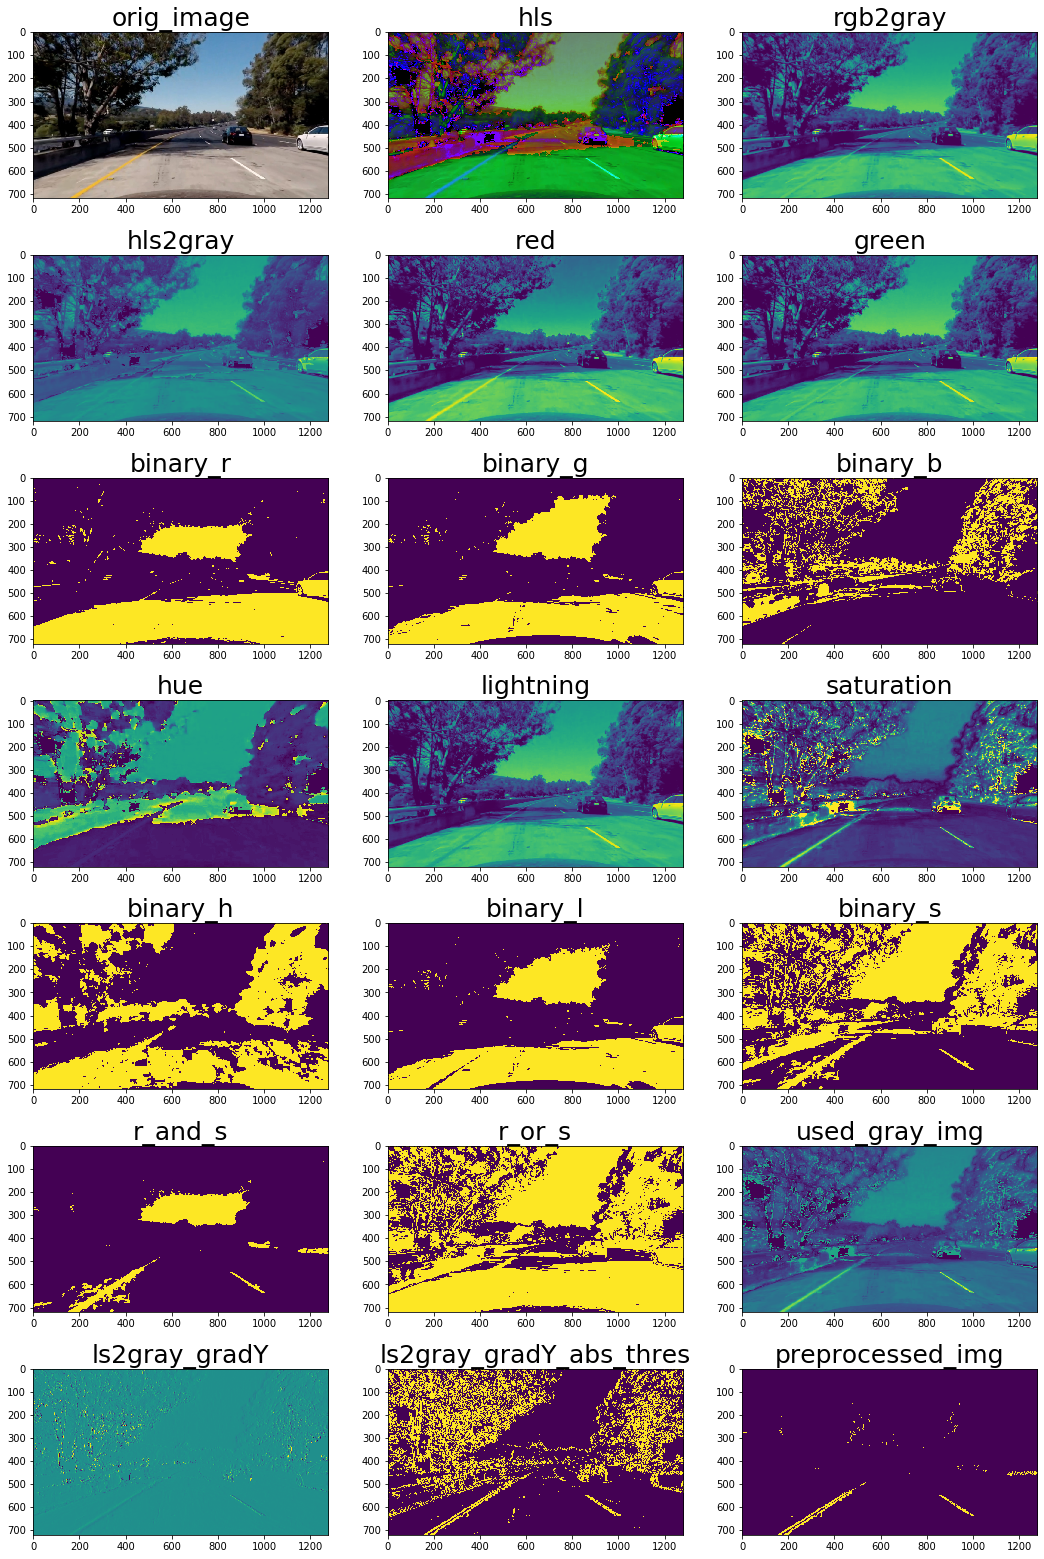

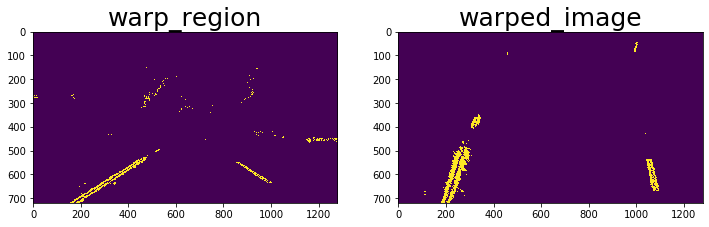

In [21]:
preprocessed_bin_image = preprocessing_pipeline(image, threshold_index=1, save_dir=output_img_dir)
plt.imshow(preprocessed_bin_image)

# Find Lane Curvature Points


[Curvature Points]
left_lane_y_points = 2518, left_lane_x_points = 2518, right_lane_y_points = 446 right_lane_x_points = 446

[Curvature Points]
left_lane_y_points = 5415, left_lane_x_points = 5415, right_lane_y_points = 2139 right_lane_x_points = 2139

[Curvature Points]
left_lane_y_points = 8994, left_lane_x_points = 8994, right_lane_y_points = 3199 right_lane_x_points = 3199

[Curvature Points]
left_lane_y_points = 10062, left_lane_x_points = 10062, right_lane_y_points = 3199 right_lane_x_points = 3199

[Curvature Points]
left_lane_y_points = 10921, left_lane_x_points = 10921, right_lane_y_points = 3230 right_lane_x_points = 3230

[Curvature Points]
left_lane_y_points = 11309, left_lane_x_points = 11309, right_lane_y_points = 3230 right_lane_x_points = 3230

[Curvature Points]
left_lane_y_points = 11309, left_lane_x_points = 11309, right_lane_y_points = 3230 right_lane_x_points = 3230

[Curvature Points]
left_lane_y_points = 11309, left_lane_x_points = 11309, right_lane_y_points = 

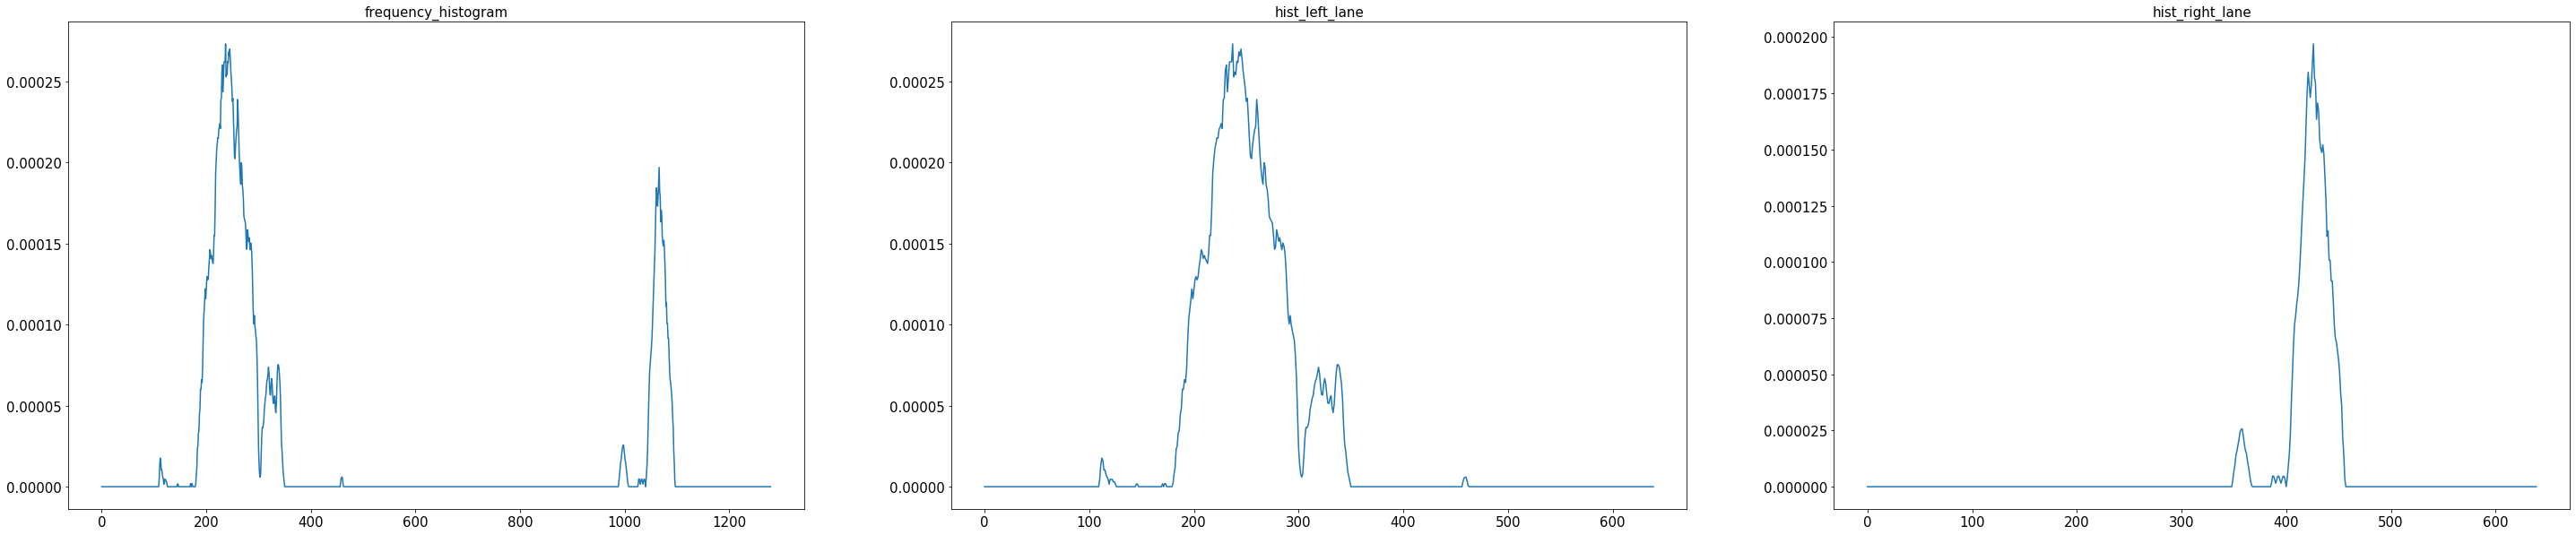

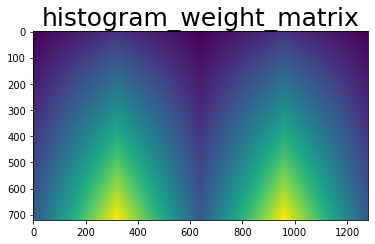

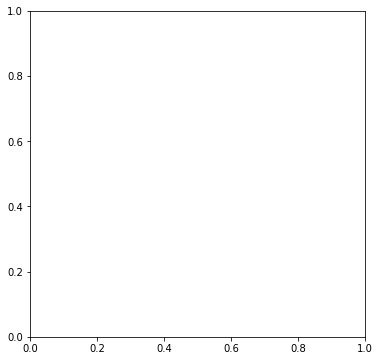

In [22]:
left_x_new, right_x_new, y_new = lane_curvature_pipeline(
            preprocessed_bin_image, save_dir=output_img_dir, mode="debug"
)

# Postprocessing 


[Lane Detection] left_lane = 720, right_lane = 720


array([[[  0,   1,   2],
        [  0,   0,   2],
        [  0,   0,   1],
        ...,
        [ 12,   8,   4],
        [ 10,   6,   3],
        [  9,   5,   3]],

       [[  0,   1,   2],
        [  0,   1,   2],
        [  0,   1,   1],
        ...,
        [  9,   6,   2],
        [  7,   4,   1],
        [  7,   4,   1]],

       [[  0,   2,   1],
        [  0,   1,   1],
        [  0,   1,   0],
        ...,
        [  8,   4,   1],
        [  6,   3,   1],
        [  7,   5,   3]],

       ...,

       [[189, 177, 163],
        [188, 176, 162],
        [188, 176, 162],
        ...,
        [169, 156, 147],
        [169, 156, 147],
        [169, 156, 147]],

       [[188, 176, 162],
        [187, 175, 161],
        [187, 175, 161],
        ...,
        [169, 156, 147],
        [169, 156, 147],
        [169, 156, 147]],

       [[187, 175, 161],
        [187, 175, 161],
        [187, 175, 161],
        ...,
        [169, 156, 147],
        [169, 156, 147],
        [169, 156, 147]]

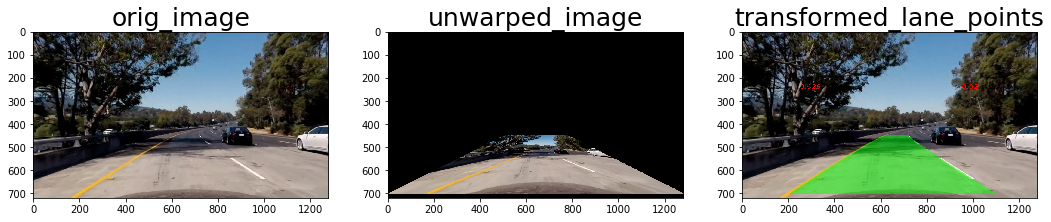

In [23]:
postprocessing_pipeline(image, left_x_new, right_x_new, y_new, save_dir=output_img_dir, mode="debug")

# Video Pipeline

In [4]:
def final_pipeline(image):
    image = undistort(
            img=image, camera_matrix=CameraParams.camera_matrix,
            distortion_coefficients=CameraParams.distortion_coefficients
    )
    
    preprocessed_bin_image = preprocessing_pipeline(image, threshold_index=1, save_dir=None)

    # -------------------------------------------------------------------------------------
    # Create Lane Curvature with 2nd degree polynomial
    # -------------------------------------------------------------------------------------
    left_x_new, right_x_new, y_new = lane_curvature_pipeline(
            preprocessed_bin_image, save_dir=None, mode="final"
    )

    # print(f'\n[Histogram] left_lane_pos_yx = {len(left_lane_pos_yx)}, right_lane_pos_yx = {len(right_lane_pos_yx)}')

    # -------------------------------------------------------------------------------------
    # Un-warp (Project curvature points into the original image space)
    # -------------------------------------------------------------------------------------
    out_image = postprocessing_pipeline(image, left_x_new, right_x_new, y_new, save_dir=output_img_dir, mode="final")
    return out_image

In [5]:
setting = "final"
video_name = "project_video"
input_video_path = f'./data/{video_name}.mp4'
output_video_path = f'./data/{video_name}'
output_img_dir = f"./data/debug_images/{video_name}"
test_img_dir = f"./data/test_images/"

os.makedirs(output_video_path, exist_ok=True)
os.makedirs(output_img_dir, exist_ok=True)
os.makedirs(test_img_dir, exist_ok=True)

In [6]:
output = f'{output_video_path}/{setting}_out.mp4'

clip2 = VideoFileClip(input_video_path)#.subclip(0, 10)
yellow_clip = clip2.fl_image(final_pipeline)
%time yellow_clip.write_videofile(output, audio=False)

t:   0%|          | 0/1260 [00:00<?, ?it/s, now=None]

Moviepy - Building video ./data/project_video/final_out.mp4.
Moviepy - Writing video ./data/project_video/final_out.mp4



t:  49%|████▉     | 620/1260 [02:16<01:48,  5.89it/s, now=None]

WARNING WARNING ==================> NO (Right Lane XY-points) FOUND


Moviepy - Done !
Moviepy - video ready ./data/project_video/final_out.mp4
CPU times: user 4min 35s, sys: 39 s, total: 5min 14s
Wall time: 4min 38s


In [7]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))